# TNG100 SEDs (No dust)
The objective is to predict the SFHs (middle column) or time at which half of the stellar mass has been built (right column) using the galaxy Spetral Energy Distribution (SED, left column)

The SEDs shown here do not contain dust emission. Therefore they lack of realism, especially at longer wavelengths. However, the sample is large.

#Images
In addition to photometric information, we also have mock images for all the galaxies in the sample. The following cell shows an example of an image without and with noise added (SDSS)

# TNG50, with dust
There are 3000 galaxies modeled with SKIRT with dust.

In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
#%load_ext autoreload

#%autoreload 2

In [2]:
!pwd

/gpfsdswork/projects/rech/qrc/ups48kf/AstroInfo2021/sfh-inference-hackathon/notebooks


In [2]:
!tfds new my_dataset

2021-12-07 22:19:34.890390: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
Dataset generated at /gpfsdswork/projects/rech/qrc/ups48kf/AstroInfo2021/sfh-inference-hackathon/sfh-sed/notebooks/my_dataset
You can start searching `TODO(my_dataset)` to complete the implementation.
Please check https://www.tensorflow.org/datasets/add_dataset for additional details.


In [2]:

# Using a mapping function to apply preprocessing to our data
def preprocessing(example):
  
  return example

def input_fn(mode='train', batch_size=64):
  """
  mode: 'train' or 'test'
  """
  if mode == 'train':
    dataset = tfds.load('my_dataset', split='train[:80%]')
    dataset = dataset.repeat()
    dataset = dataset.shuffle(10000)

  dataset = dataset.batch(batch_size, drop_remainder=True)
  dataset = dataset.map(preprocessing) # Apply data preprocessing
  dataset = dataset.prefetch(-1)       # fetch next batches while training current one (-1 for autotune)
  return dataset

In [ ]:
import my_dataset

# train_dset = tfds.load('my_dataset', split='train')
dataset_training = input_fn('train')

Importing utils.py...


In [ ]:
train_dset.take(1)


<TakeDataset shapes: {flux: (143,), mass: (100,), object_id: (), quantile: (9,), time: (100,)}, types: {flux: tf.float32, mass: tf.float32, object_id: tf.float32, quantile: tf.float32, time: tf.float32}>

In [ ]:
for (batch, entry) in enumerate(train_dset.take(10)):
  print(entry['quantile'])
  # cutouts.append(entry['image'])

tf.Tensor(
[0.70424074 0.665315   0.6255695  0.52997065 0.50067735 0.49127728
 0.48205364 0.46412268 0.45325613], shape=(9,), dtype=float32)
tf.Tensor(
[0.665315   0.61674005 0.558326   0.49127728 0.38399    0.31172794
 0.24949284 0.19316822 0.1214141 ], shape=(9,), dtype=float32)
tf.Tensor(
[0.8757517  0.8352236  0.8156684  0.7928056  0.7705836  0.7633156
 0.75254184 0.74192023 0.11634526], shape=(9,), dtype=float32)
tf.Tensor(
[0.70424074 0.6345255  0.5881985  0.52997065 0.48205364 0.45325613
 0.44474635 0.42416435 0.38399   ], shape=(9,), dtype=float32)
tf.Tensor(
[0.714323   0.70424074 0.6748399  0.65592444 0.6255695  0.61674005
 0.60803515 0.5881985  0.569009  ], shape=(9,), dtype=float32)
tf.Tensor(
[0.7349225  0.69430083 0.65592444 0.6345255  0.61674005 0.60803515
 0.5881985  0.57715523 0.569009  ], shape=(9,), dtype=float32)
tf.Tensor(
[0.04751386 0.04751386 0.04751386 0.04751386 0.04751386 0.04751386
 0.04751386 0.04751386 0.04751386], shape=(9,), dtype=float32)
tf.Tensor(
[0.

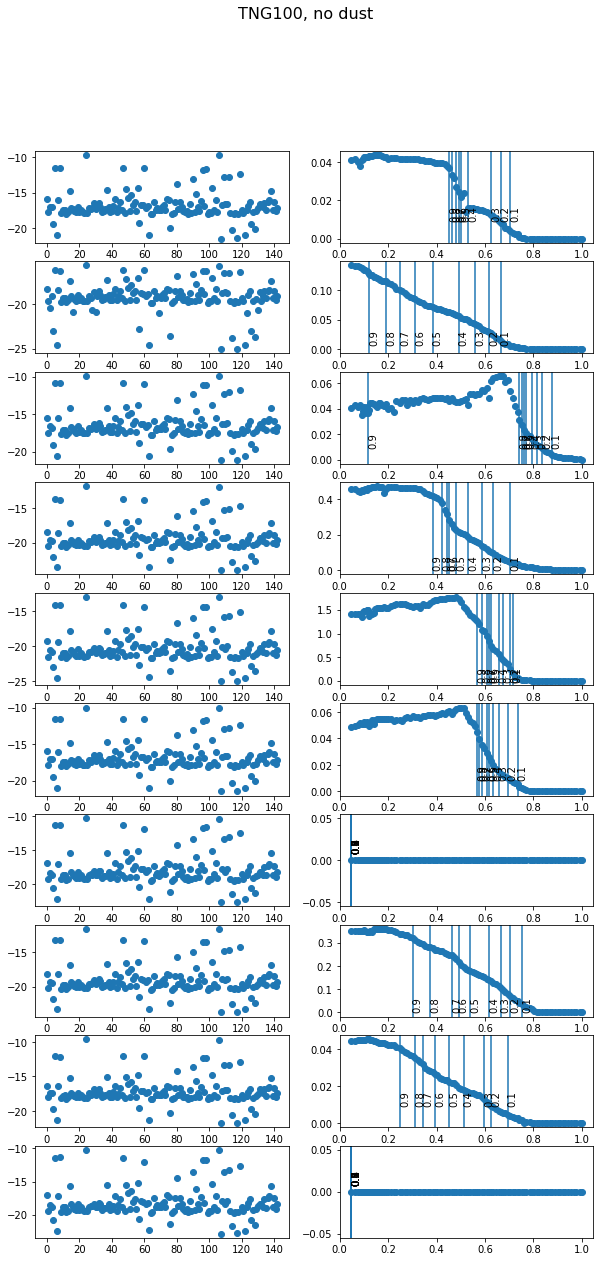

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(10, 2)
fig.set_size_inches(10, 20)
fig.suptitle("TNG100, no dust", fontsize=16)
i = 0
for (batch, entry) in enumerate(train_dset.take(10)):
  # print(entry['quantile'])
  # cutouts.append(entry['image'])    sh = 
  # obj=phot_cat.loc[sh][:]
    #apparent mags
  # app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
  flux = entry['flux']
  mass = entry['mass']
  # print(flux.shape, entry['time'])
  axs[i, 0].scatter(np.arange(len(flux)), flux)
  axs[i, 1].scatter(entry['time'], mass)
  for j in range(9):
    quantile = entry['quantile'][j]
    axs[i, 1].axvline(quantile)
    axs[i, 1].text(quantile, 0.01, (j+1)/10, rotation='vertical')
  i += 1
    